In [27]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, classification_report, confusion_matrix

In [28]:
train_data = pd.read_csv('../data/processed_train.csv')
test_data = pd.read_csv('../data/processed_test.csv')

In [29]:
train_data['crimeaditionalinfo'] = train_data['crimeaditionalinfo'].fillna('')
test_data['crimeaditionalinfo'] = test_data['crimeaditionalinfo'].fillna('')

In [30]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train = vectorizer.fit_transform(train_data['crimeaditionalinfo'])
X_test = vectorizer.transform(test_data['crimeaditionalinfo'])

In [31]:
label_encoder = LabelEncoder()

all_categories = pd.concat([train_data['category'], test_data['category']]).unique()
label_encoder.fit(all_categories)

y_train = label_encoder.transform(train_data['category'])
y_test = label_encoder.transform(test_data['category'])

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Encoded labels (y_train): {y_train}")
print(f"Encoded labels (y_test): {y_test}")

Shape of X_train: (91965, 5000)
Shape of X_test: (22992, 5000)
Encoded labels (y_train): [9 9 9 ... 9 9 9]
Encoded labels (y_test): [9 9 9 ... 0 9 7]


In [32]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [33]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.7390396659707724
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.10      0.17      2895
           1       0.83      0.16      0.27        95
           2       0.00      0.00      0.00         1
           3       0.84      0.13      0.22       127
           4       1.00      1.00      1.00       974
           5       0.00      0.00      0.00        43
           6       0.63      0.08      0.14       460
           7       0.57      0.57      0.57      3240
           8       0.00      0.00      0.00        49
           9       0.76      0.98      0.86     14024
          10       0.00      0.00      0.00       116
          11       0.00      0.00      0.00        15
          12       1.00      0.10      0.19        67
          13       0.72      0.03      0.06       403
          14       0.71      0.06      0.10       483

    accuracy                           0.74     22992
   macro avg       0.

/Users/chiragagg5k/Desktop/Coding_Stuff/netra/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/chiragagg5k/Desktop/Coding_Stuff/netra/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/chiragagg5k/Desktop/Coding_Stuff/netra/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

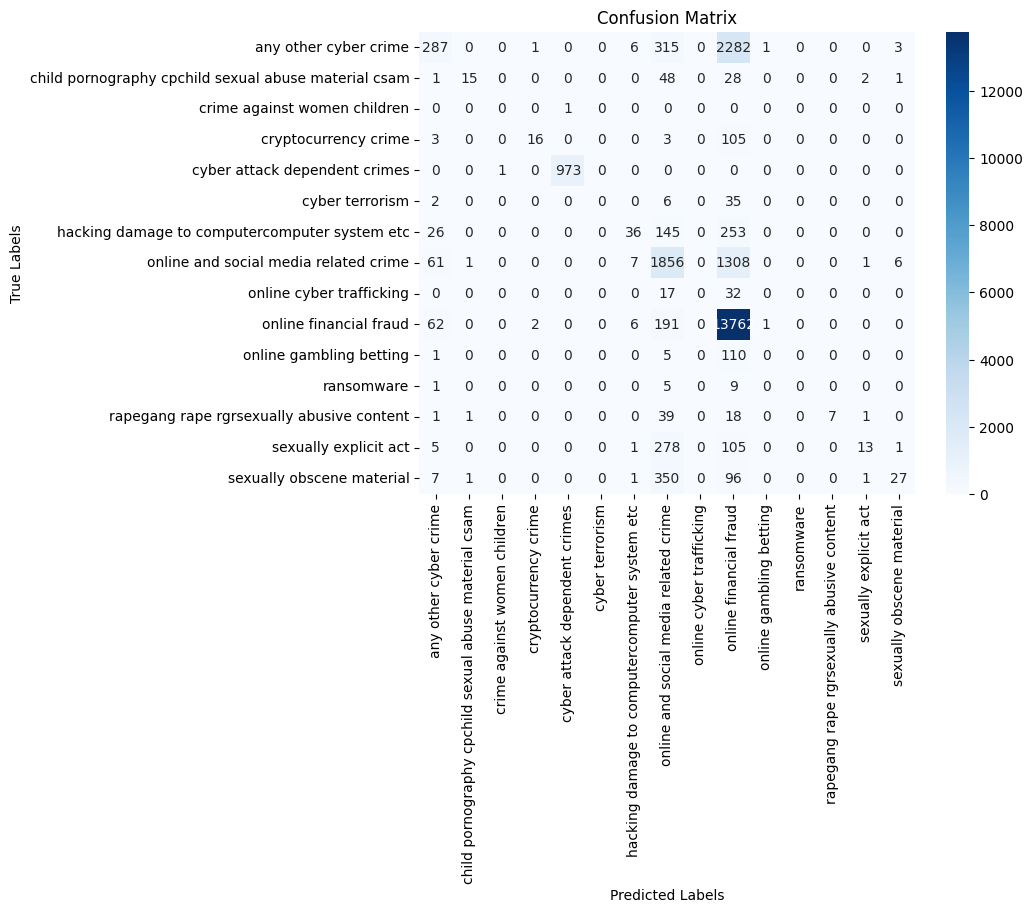

In [35]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()